# 기본 모듈 설치하기

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import datetime
from datetime import timedelta
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from matplotlib import pyplot
import matplotlib.font_manager as fm
import seaborn as sns
from scipy import stats
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
# 노트북 안에 그래프를 그리기 위해
%matplotlib inline
# 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 스타일을 사용
plt.style.use('ggplot')
# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

# 선형회귀분석을 위한 모듈 설치하기
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

In [2]:
# matplolib모듈에 기본적으로 설정되어 있는 키값을 확인
for key in plt.rcParamsDefault.keys():
    if 'font' in key:
        print('{}: {}'.format(key,plt.rcParamsDefault[key]))

font.cursive: ['Apple Chancery', 'Textile', 'Zapf Chancery', 'Sand', 'Script MT', 'Felipa', 'cursive']
font.family: ['sans-serif']
font.fantasy: ['Comic Sans MS', 'Chicago', 'Charcoal', 'Impact', 'Western', 'Humor Sans', 'xkcd', 'fantasy']
font.monospace: ['DejaVu Sans Mono', 'Bitstream Vera Sans Mono', 'Computer Modern Typewriter', 'Andale Mono', 'Nimbus Mono L', 'Courier New', 'Courier', 'Fixed', 'Terminal', 'monospace']
font.sans-serif: ['DejaVu Sans', 'Bitstream Vera Sans', 'Computer Modern Sans Serif', 'Lucida Grande', 'Verdana', 'Geneva', 'Lucid', 'Arial', 'Helvetica', 'Avant Garde', 'sans-serif']
font.serif: ['DejaVu Serif', 'Bitstream Vera Serif', 'Computer Modern Roman', 'New Century Schoolbook', 'Century Schoolbook L', 'Utopia', 'ITC Bookman', 'Bookman', 'Nimbus Roman No9 L', 'Times New Roman', 'Times', 'Palatino', 'Charter', 'serif']
font.size: 10.0
font.stretch: normal
font.style: normal
font.variant: normal
font.weight: normal
legend.fontsize: medium
legend.title_fontsize:

In [3]:
# 내 컴퓨터에 원하는 폰트가 있는 위치를 지정하기
font_path = 'C:/Windows/Fonts/malgunbd.ttf'
# 원하는 폰트이름을 저장하기
font_name = fm.FontProperties(fname=font_path).get_name()
# 원하는 폰트를 font.family 파라미터에 업데이트 시키고 사이즈 조절하기
plt.rcParams['font.family'] = font_name
plt.rcParams['font.size'] = 12

# 선형회귀분석

**[모델생성 훈련용 데이터 X,y값에 대한 선형회귀식 2종류 그리는 과정]**

**1. X,y 데이터값을 만든다.**

**2. X,y값을 가지고 lr모델을 만든다. (모델은 실제값을 가지고 만든다)**

   * 이렇게 만든 lr모델을 가지고 실제 X값이 아니라, X값과 동일한 범위에서 임의의 값 10개를 선택한다.
   * 선택한 10개의 X값을 X_fit로 놓고, lr모델에 대입하여 10개의 피팅값 y를 구하고 y_lin_fit으로 놓는다. -> X_fit, y_lin_fit
   

**3. 다항식 변형함수를 선언하고 X값을 함수모델에 대입하여 2차 다항식 값으로 변형시킨다. -> X_quad**

**4. X_quad,y값을 가지고 pr모델을 만든다. (모델은 실제값을 가지고 만든다)**

   * X_fit값을 가지고 2차 다항식의 X값을 만든다. -> X_quad_fit
   * X_quad_fit값을 pr모델에 대입하여 피팅값 y를 구한다. -> X_quad_fit, y_quad_fit
   

**5. lr과 pr모델 평가를 한다.**
   * lr모델 : 실제값 X를 대입한 예측값 y_lin_pred와 y를 비교한다.
   * pr모델 : 실제값 X_quad를 대입한 예측값 y_quad_pred와 y를 비교한다.
   * MSE와 R^2결정계수값을 구한다.
   
   
**6. 회귀선 시각화**
   * 단순선형회귀: X_fit값, y_lin_fit값
   * 다항회귀 : X_fit값, y_quad_fit값

## 데이터 만들기 : 2차원 array로 변경

In [26]:
# X데이터 리스트 형태로 입력하고 1차원 array로 변경해주고 np.newaxis를 이용하여 2차원 array로 변경해 주기
X = np.array([258.0,270.0,294.0,320.0,342.0,
              368.0,396.0,446.0,480.0,586.0])[:,np.newaxis]

y = np.array([236.4,234.4,252.8,298.6,314.2,
              342.2,360.8,368.0,391.2,390.8])

## 선형회귀선을 그리기 위한 y값 생성

In [27]:
lr = LinearRegression()
pr = LinearRegression()

In [28]:
# 다항회귀와 단순선형회귀의 비교를 위해 단순선형회귀계산

# X와 y값을 입력하여 선형회귀 fitting하여 모델을 만든다
lr.fit(X,y)

# X값 범위와 동일한 범위로 X_fit값을 임의로 10개를 만들어 2차원 array로 변경해 준다.
X_fit = np.arange(250,600,10)[:,np.newaxis]

In [29]:
# 임의로 만든 X_fit값에 대해서 만든 모델(lr)에 대입시켜 y_lin_fit값을 만든다
y_lin_fit = lr.predict(X_fit)
y_lin_fit

array([250.86164718, 256.26469105, 261.66773493, 267.0707788 ,
       272.47382268, 277.87686655, 283.27991043, 288.6829543 ,
       294.08599818, 299.48904205, 304.89208593, 310.2951298 ,
       315.69817368, 321.10121755, 326.50426142, 331.9073053 ,
       337.31034917, 342.71339305, 348.11643692, 353.5194808 ,
       358.92252467, 364.32556855, 369.72861242, 375.1316563 ,
       380.53470017, 385.93774405, 391.34078792, 396.7438318 ,
       402.14687567, 407.54991955, 412.95296342, 418.3560073 ,
       423.75905117, 429.16209505, 434.56513892])

## 다항회귀선을 그리기 위한 y값 생성

In [30]:
# 다항회귀 모델을 만들고, 그 모델에 X값 대입해서 다항회귀용 X_quad값 만들기 
quadratic = PolynomialFeatures(degree = 2)
X_quad = quadratic.fit_transform(X)

In [31]:
quadratic

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [32]:
X_quad

array([[1.00000e+00, 2.58000e+02, 6.65640e+04],
       [1.00000e+00, 2.70000e+02, 7.29000e+04],
       [1.00000e+00, 2.94000e+02, 8.64360e+04],
       [1.00000e+00, 3.20000e+02, 1.02400e+05],
       [1.00000e+00, 3.42000e+02, 1.16964e+05],
       [1.00000e+00, 3.68000e+02, 1.35424e+05],
       [1.00000e+00, 3.96000e+02, 1.56816e+05],
       [1.00000e+00, 4.46000e+02, 1.98916e+05],
       [1.00000e+00, 4.80000e+02, 2.30400e+05],
       [1.00000e+00, 5.86000e+02, 3.43396e+05]])

In [33]:
# X_quad와 y에 대한 다항회귀모델 만들기
pr.fit(X_quad,y)

# X_fit값을 다항회귀모델 fitting용으로 값을 변형시키기  
X_quad_fit = quadratic.fit_transform(X_fit)

# 다항회귀모델용으로 변형된 X_quad_fit값에 대한 y값인 y_quad_fit값을 계산 
y_quad_fit = pr.predict(X_quad_fit)
y_quad_fit

array([215.86619864, 228.37947485, 240.44271083, 252.0559066 ,
       263.21906215, 273.93217748, 284.19525259, 294.00828748,
       303.37128216, 312.28423661, 320.74715085, 328.76002487,
       336.32285867, 343.43565226, 350.09840562, 356.31111877,
       362.0737917 , 367.38642441, 372.2490169 , 376.66156917,
       380.62408123, 384.13655306, 387.19898468, 389.81137608,
       391.97372726, 393.68603823, 394.94830897, 395.7605395 ,
       396.12272981, 396.03487989, 395.49698977, 394.50905942,
       393.07108885, 391.18307807, 388.84502707])

## lr과 pr모델 평가하기

In [34]:
# 단순회귀 및 다항회귀 모델의 예측값 계산
y_lin_pred = lr.predict(X)
y_quad_pred = pr.predict(X_quad)

print(y_lin_pred)
print('\n--------------\n')
print(y_quad_pred)

[255.18408228 261.66773493 274.63504023 288.6829543  300.56965083
 314.6175649  329.74608775 356.76130712 375.1316563  432.40392137]

--------------

[225.91282282 240.44271083 267.55831311 294.00828748 314.01282268
 334.84629513 353.88003834 379.09308123 389.81137608 389.8342523 ]


$$ MSE(Mean Squared Error) = \sum(y_i - y)^2$$

### MSE (평균제곱오차)로 평가

In [35]:
mse_lin = mean_squared_error(y,y_lin_pred)
mse_quad = mean_squared_error(y,y_quad_pred)

print(mse_lin)
print(mse_quad)

569.7796663183207
61.330214517447715


### R^2 (결정계수)로 평가

In [36]:
r2_lin = r2_score(y,y_lin_pred)
r2_quad = r2_score(y,y_quad_pred)

print('MSE\tLinear: %.2f,\tQuadratic: %.2f' %(mse_lin,mse_quad))
print('R2\tLinear: %.2f,\tQuadratic: %.2f' %(r2_lin,r2_quad))

MSE	Linear: 569.78,	Quadratic: 61.33
R2	Linear: 0.83,	Quadratic: 0.98


## 회귀선 시각화 비교

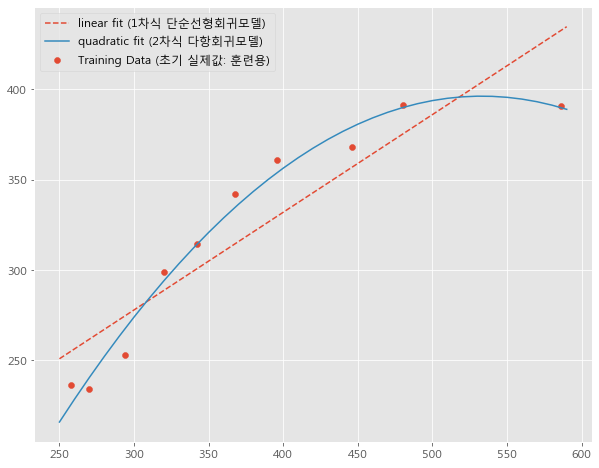

In [37]:
fig, ax = plt.subplots(figsize=(10,8))

plt.scatter(X,y,label='Training Data (초기 실제값: 훈련용)')                           # 초기 실제값
plt.plot(X_fit,y_lin_fit,label='linear fit (1차식 단순선형회귀모델)',linestyle='--')    # lr모델로 fitting한 값
plt.plot(X_fit,y_quad_fit,label='quadratic fit (2차식 다항회귀모델)')                  # pr모델로 fitting한 값 
plt.legend(loc=2)
plt.show()